## Flight Delay Prediciton
```
- Author: Ahmed Mohsen ALi
```



## Test for libraries installation 

In [ ]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

## Read Data with Pandas

In [ ]:
data = pd.read_csv('./flight_delay.csv')
data.rename(columns = {'Scheduled depature time': 'Scheduled_depature_time', 'Scheduled arrival time': 'Scheduled_arrival_time','Depature Airport':'Depature_Airport','Destination Airport':'Destination_Airport'}
            , inplace = True) #Change columns names so that they can be accessed later 


## Data exploration

In [ ]:
print('Data Exploration:')
print(data.head())

Data Exploration:
  Depature_Airport Scheduled_depature_time  ... Scheduled_arrival_time Delay
0              SVO     2015-10-27 07:40:00  ...    2015-10-27 20:45:00   0.0
1              SVO     2015-10-27 09:50:00  ...    2015-10-27 20:35:00   2.0
2              SVO     2015-10-27 10:45:00  ...    2015-10-27 23:35:00   0.0
3              SVO     2015-10-27 12:30:00  ...    2015-10-28 01:20:00   0.0
4              OTP     2015-10-27 14:15:00  ...    2015-10-27 16:40:00   9.0

[5 rows x 5 columns]


In [ ]:
types = data.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 4
Depature_Airport            object
Scheduled_depature_time     object
Destination_Airport         object
Scheduled_arrival_time      object
Delay                      float64
dtype: object


### **Features Engineering**

In [ ]:
data['Scheduled_depature_time']  =pd.to_datetime(data.Scheduled_depature_time)#Converting from string to datetime
data['Scheduled_arrival_time']=pd.to_datetime(data.Scheduled_arrival_time)#Converting from string to datetime
data['flight_duration']=((data['Scheduled_arrival_time']-data['Scheduled_depature_time']).dt.total_seconds())/60 #Calculating fligth duration
data=data.drop('Scheduled_arrival_time',axis=1)

print('\nData with flight duration:')
print(data.head())


Data with flight duration:
  Depature_Airport Scheduled_depature_time  ... Delay  flight_duration
0              SVO     2015-10-27 07:40:00  ...   0.0            785.0
1              SVO     2015-10-27 09:50:00  ...   2.0            645.0
2              SVO     2015-10-27 10:45:00  ...   0.0            770.0
3              SVO     2015-10-27 12:30:00  ...   0.0            770.0
4              OTP     2015-10-27 14:15:00  ...   9.0            145.0

[5 rows x 5 columns]


In [ ]:
types = data.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 2
Depature_Airport                   object
Scheduled_depature_time    datetime64[ns]
Destination_Airport                object
Delay                             float64
flight_duration                   float64
dtype: object


### **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_feats = ['Depature_Airport' , 'Destination_Airport']
new_data=data[cat_feats].apply(encoder.fit_transform)
data['Depature_Airport'],data['Destination_Airport'] = new_data['Depature_Airport'] ,new_data['Destination_Airport']
 

In [ ]:
print('Label Encoder Result:')
print(data.head())

Label Encoder Result:
   Depature_Airport Scheduled_depature_time  ...  Delay  flight_duration
0               144     2015-10-27 07:40:00  ...    0.0            785.0
1               144     2015-10-27 09:50:00  ...    2.0            645.0
2               144     2015-10-27 10:45:00  ...    0.0            770.0
3               144     2015-10-27 12:30:00  ...    0.0            770.0
4               113     2015-10-27 14:15:00  ...    9.0            145.0

[5 rows x 5 columns]


### **Data Splitting**

In [ ]:
#Split the data by datetime
ts=pd.to_datetime('1/1/2018')
train_data=data.loc[data.Scheduled_depature_time< ts,:]
test_data=data.loc[data.Scheduled_depature_time >= ts,:]

#Drop Scheduled_depature_time feature as it will not be a predictor
train_data=train_data.drop('Scheduled_depature_time',axis=1)
test_data=test_data.drop('Scheduled_depature_time',axis=1)

#Reset the index and drop the old index
test_data=test_data.reset_index()
test_data=test_data.drop('index',axis=1)
train_data=train_data.reset_index()
train_data=train_data.drop('index',axis=1)




In [ ]:
#Extracting x_train,y_train,x_test,y_test 
x_train,y_train = train_data.drop('Delay', axis=1),train_data['Delay']
x_test,y_test = test_data.drop('Delay', axis=1),test_data['Delay']


### **Features Scaling**


In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler =  MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

### **Visualizing The data**

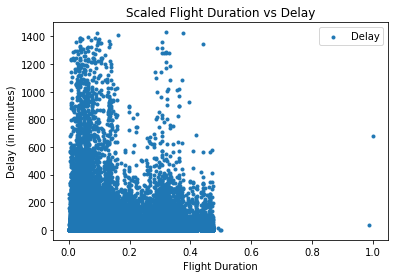

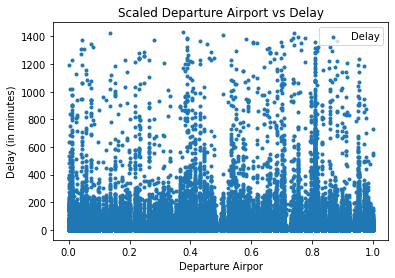

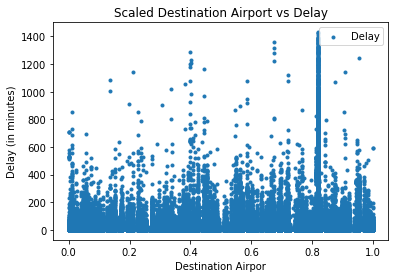

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot Scaled Flight Duration vs Delay.
plt.scatter(x_train[:,2],y_train, label= 'Delay',marker='.')
plt.title('Scaled Flight Duration vs Delay')
plt.xlabel('Flight Duration')
plt.ylabel('Delay (in minutes)')
plt.legend(loc = 1)
plt.show()

# Plot Scaled Departure Airport vs Delay.
plt.scatter(x_train[:,0],y_train, label= 'Delay',marker='.')
plt.title('Scaled Departure Airport vs Delay')
plt.xlabel('Departure Airpor')
plt.ylabel('Delay (in minutes)')
plt.legend(loc = 1)
plt.show()


# Plot Scaled Destination Airport vs Delay.
plt.scatter(x_train[:,1],y_train, label= 'Delay',marker='.')
plt.title('Scaled Destination Airport vs Delay')
plt.xlabel('Destination Airpor')
plt.ylabel('Delay (in minutes)')
plt.legend(loc = 1)
plt.show()

# **Outlier Detection**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
#x_train=x_train.values
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_train)

print("Before Outliers: ",x_train.shape, y_train.shape)
# select all rows that are not outliers
mask = yhat != -1
x_train, y_train = x_train[mask, :], y_train[mask]


# summarize the shape of the updated training dataset
print("After Outliers: ",x_train.shape, y_train.shape)

Before Outliers:  (499062, 3) (499062,)
After Outliers:  (498112, 3) (498112,)


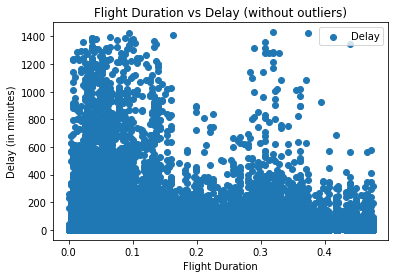

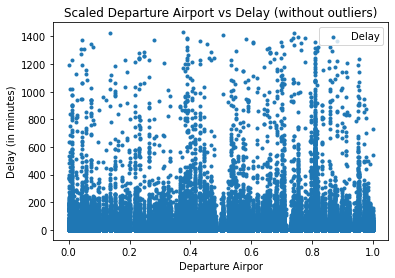

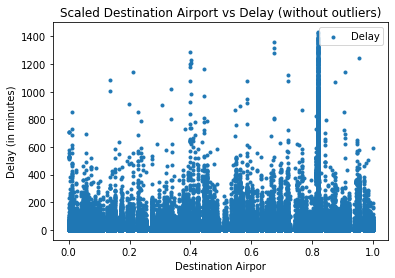

In [ ]:
plt.scatter(x_train[:,2],y_train, label= 'Delay')
plt.title('Flight Duration vs Delay (without outliers)')
plt.xlabel('Flight Duration')
plt.ylabel('Delay (in minutes)')
#plt.xlim([0,1])
plt.legend(loc = 1)
plt.show()

plt.scatter(x_train[:,0],y_train, label= 'Delay',marker='.')
plt.title('Scaled Departure Airport vs Delay (without outliers)')
plt.xlabel('Departure Airpor')
plt.ylabel('Delay (in minutes)')
plt.legend(loc = 1)
plt.show()


# Plot Scaled Destination Airport vs Delay.
plt.scatter(x_train[:,1],y_train, label= 'Delay',marker='.')
plt.title('Scaled Destination Airport vs Delay (without outliers)')
plt.xlabel('Destination Airpor')
plt.ylabel('Delay (in minutes)')
plt.legend(loc = 1)
plt.show()

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred1 = regressor.predict(x_test)
yr_pred1 = regressor.predict(x_train)

Model intercept : 5.7562632004990615
Model coefficient : [-1.17609685  5.63872099 25.86065995]


In [ ]:
print("\n\n\n\tLinear Regression Results")
print('Train Error: ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, yr_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, yr_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, yr_pred1)))
print('Coefficient of Determination:', metrics.r2_score(y_train, yr_pred1))

print('\nTest Error: ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred1))




	Linear Regression Results
Train Error: 
Mean Absolute Error: 15.306529435061801
Mean Squared Error: 2123.1660844217936
Root Mean Squared Error: 46.07782638560323
Coefficient of Determination: 0.0031047988570874763

Test Error: 
Mean Absolute Error: 14.318233922840445
Mean Squared Error: 1616.860973687007
Root Mean Squared Error: 40.2102098189876
Coefficient of Determination: -0.008790607661887995


### **Polynomial Regression**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

degrees = [2, 3, 4]


for i in range(len(degrees)):
    
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train, y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=6)

    yr_pred1=pipeline.predict(x_train)
    y_pred1 = pipeline.predict(x_test)
    
    print('\n\n\n\t\t This is Polynomial Regression with ',degrees[i],'degree' )
    print('Train Error: ')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, yr_pred1))
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, yr_pred1))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, yr_pred1)))
    print('Coefficient of Determination:', metrics.r2_score(y_train, yr_pred1))
    print('\nTest Error: ')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
    print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred1))





		 This is Polynomial Regression with  2 degree
Train Error: 
Mean Absolute Error: 15.300358252253961
Mean Squared Error: 2121.8302475501405
Root Mean Squared Error: 46.06332866337539
Coefficient of Determination: 0.0037320175078709994

Test Error: 
Mean Absolute Error: 14.311518688445958
Mean Squared Error: 1615.8971132060221
Root Mean Squared Error: 40.19822276178416
Coefficient of Determination: -0.008189236600220973



		 This is Polynomial Regression with  3 degree
Train Error: 
Mean Absolute Error: 15.284184321857953
Mean Squared Error: 2119.4681900887745
Root Mean Squared Error: 46.03768228406785
Coefficient of Determination: 0.00484107994313554

Test Error: 
Mean Absolute Error: 14.410225488606303
Mean Squared Error: 1631.5762398604581
Root Mean Squared Error: 40.392774599678816
Coefficient of Determination: -0.017971744782893095



		 This is Polynomial Regression with  4 degree
Train Error: 
Mean Absolute Error: 15.276524014052061
Mean Squared Error: 2118.0921379423103
Roo

### **Lasso Regularizaiton**



In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)
print("Lasso Coefficient", lasso.coef_)

Lasso Coefficient [-0.  0.  0.]


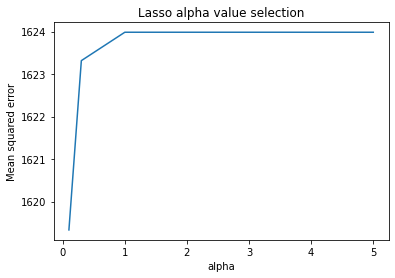

Best value of alpha: 0.1 8


In [ ]:
from sklearn.metrics import mean_squared_error
%matplotlib inline
alphas = [5, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred3 = lasso.predict(x_test)
    mse = mean_squared_error(y_test, y_pred3)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha,np.argmin(losses))

In [ ]:
from sklearn import metrics
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_lass=lasso.predict(x_train)

y_pred_lasso = lasso.predict(x_test)

print('\n\n\n\tLasso Regularization Results')
print('Train Error: ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_lass))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_lass))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_lass)))
print('Coefficient of Determination:', metrics.r2_score(y_train, y_lass))

print('\nTest Error: ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso)))
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred_lasso))




	Lasso Regularization Results
Train Error: 
Mean Absolute Error: 15.385630585801302
Mean Squared Error: 2124.958185440015
Root Mean Squared Error: 46.09726874165122
Coefficient of Determination: 0.002263349420730809

Test Error: 
Mean Absolute Error: 14.40966007886578
Mean Squared Error: 1619.3310122499201
Root Mean Squared Error: 40.240912169705105
Coefficient of Determination: -0.010331712149769468


Lasso Coefficient [-0.4058524   4.21010808 10.13849261]


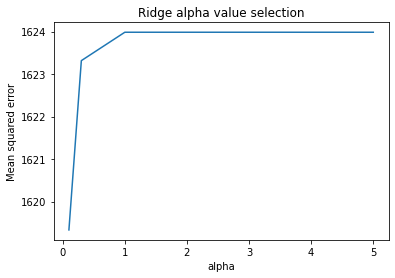

Best value of alpha: 0.1 8


In [ ]:
from sklearn.linear_model import Ridge


ridge = Ridge()
ridge.fit(x_train, y_train)

print("Lasso Coefficient", lasso.coef_)

from sklearn.metrics import mean_squared_error
%matplotlib inline
alphas = [5, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses1 = []
for alpha in alphas:
  
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred4 = ridge.predict(x_test)
    mse = mean_squared_error(y_test, y_pred3)
    losses1.append(mse)
plt.plot(alphas, losses)
plt.title("Ridge alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha,np.argmin(losses))

In [ ]:
from sklearn import metrics
ridge = Ridge(best_alpha)
ridge.fit(x_train, y_train)
y_ridge=ridge.predict(x_train)

y_pred_ridge = ridge.predict(x_test)
print('\n\n\n\tRidge Regularization Results')
print('Train Error: ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(y_train,y_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_ridge)))
print('Coefficient of Determination:', metrics.r2_score(y_train, y_ridge))

print('\nTest Error: ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred_ridge))




	Ridge Regularization Results
Train Error: 
Mean Absolute Error: 15.306532149090618
Mean Squared Error: 2123.1660844260723
Root Mean Squared Error: 46.077826385649665
Coefficient of Determination: 0.0031047988550785277

Test Error: 
Mean Absolute Error: 14.318237745538719
Mean Squared Error: 1616.8610151884823
Root Mean Squared Error: 40.21021033504404
Coefficient of Determination: -0.008790633555455285
